#**TASK2 - Prediction using Unsupervised ML**<br>
##Name: Apeksha Kamath<br>
Task description - From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually. <br>


In [ ]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['Species'] = iris.target
data['Species'] = data['Species'].replace(to_replace= [0, 1, 2], value = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
data.head(10) # View the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.shape #There are 150 rows and 5 columns

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are no null values in the dataset

In [ ]:
#Statistical description of the dataset
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

# Visualisation

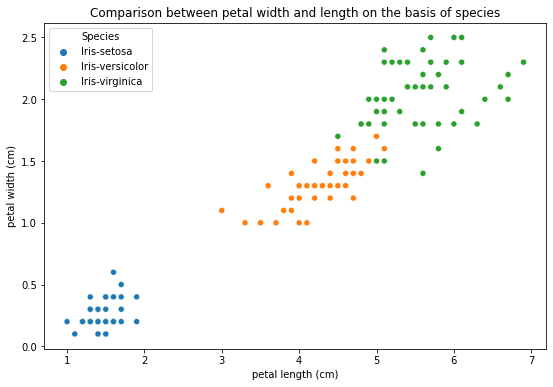

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(data['petal length (cm)'], data['petal width (cm)'], hue = data['Species']);

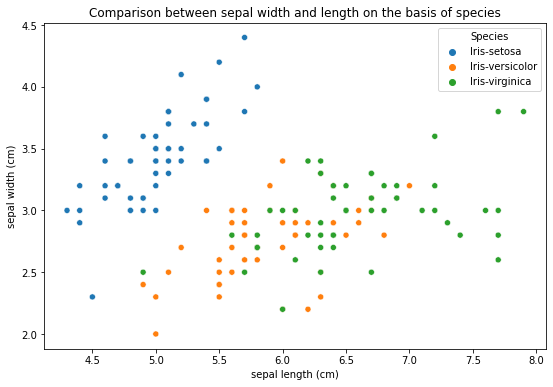

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(data['sepal length (cm)'], data['sepal width (cm)'], hue = data['Species']);

From the plots it can be inferred that:<br>
 

*   The setosa species is the most easily distinguishable because of its small feature size.
*   The Versicolor and Virginica species seem hard to separate. Versicolor has average feature sizes and virginica has larger feature sizes.



# Finding the optimum number of clusters for k-means classification

In [ ]:
#Importing necessary libraries
from sklearn.cluster import KMeans

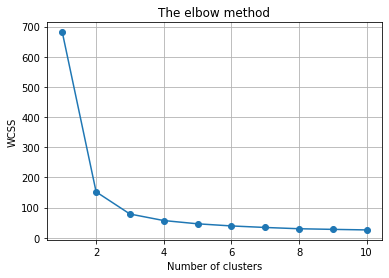

In [ ]:
x = data.iloc[:, :4].values
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting a line that has a slope nearest to 90 degrees compared to y axis to get the optimal number of clusters
plt.plot(range(1, 11), wcss,"-o")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid(True)
plt.show()

From this we choose the number of clusters as 3.

In [ ]:
# Applying kmeans to our dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

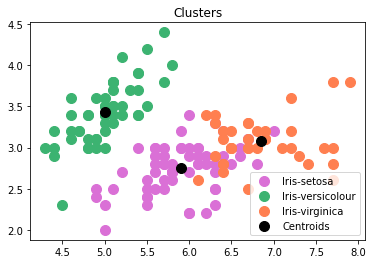

In [ ]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orchid', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'mediumseagreen', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'coral', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()
